# Detecting Heart Disease

Here we have data from the cleveland clinic that will be used to make a ML model that accurately detects the presence of heart disease in a patient.

Data was received from here: [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) See: 'https://archive.ics.uci.edu/dataset/45/heart+disease'

Only 14 attributes used:

      1. #3  (age)       
      2. #4  (sex) (1 = male; 0 = female)      
      3. #9  (cp) chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic       
      4. #10 (trestbps) resting blood pressure (in mm Hg on admission to the hospital) 
      5. #12 (chol) serum cholestoral in mg/dl     
      6. #16 (fbs) (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)      
      7. #19 (restecg) resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
      8. #32 (thalach) maximum heart rate achieved  
      9. #38 (exang) exercise induced angina (1 = yes; 0 = no)    
      10. #40 (oldpeak) ST depression induced by exercise relative to rest  
      11. #41 (slope)  the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping    
      12. #44 (ca) number of major vessels (0-3) colored by flourosopy       
      13. #51 (thal)  3 = normal; 6 = fixed defect; 7 = reversable defect     
      14. #58 (num) diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)      (the predicted attribute)

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from scipy import stats

In [160]:
df = pd.read_csv(r"C:\Users\jdgoe\Downloads\heart+disease\processed.cleveland.csv")

In [161]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Cleaning

In [162]:
# Remove spaces from values in header
df.columns = df.columns.str.strip()

Let's turn our value we are predicting into a binary because we're only interested in if it is present or not.

In [163]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [164]:
# Drops rows with '?' and turn column into float
df = df[df['thal'] != '?']
df = df[df['ca'] != '?']
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [166]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


All of our categorical variables have already been numerized, let's evaluate initial correlations

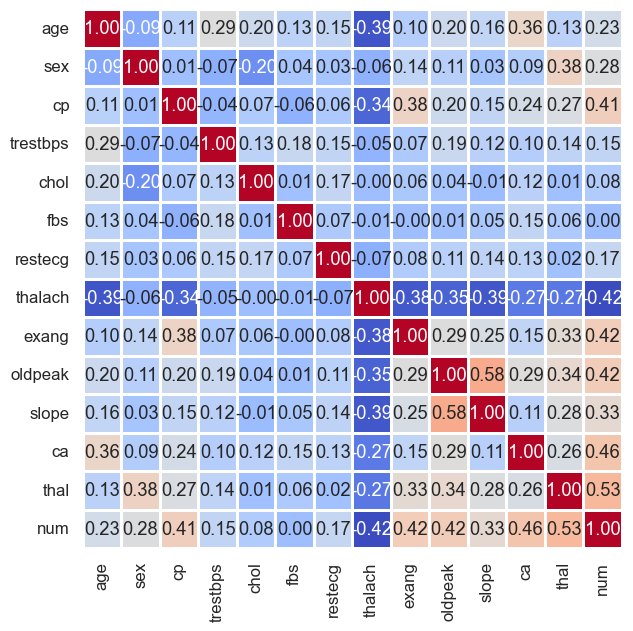

In [167]:
plt.figure(figsize=(7,7))
correlations = df.corr()
# Seeing the correlation between variables 
sns.set(font_scale=1.1)

sns.heatmap(correlations,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            linewidths=1,
            cbar=False)

plt.show()

Some features stick out strongly while others seem week. Among the strong: Slope, oldpeak, exang, thalac, cp. Among the weak: fbs, chol, trestbps. The rest are somewhere inbetween.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

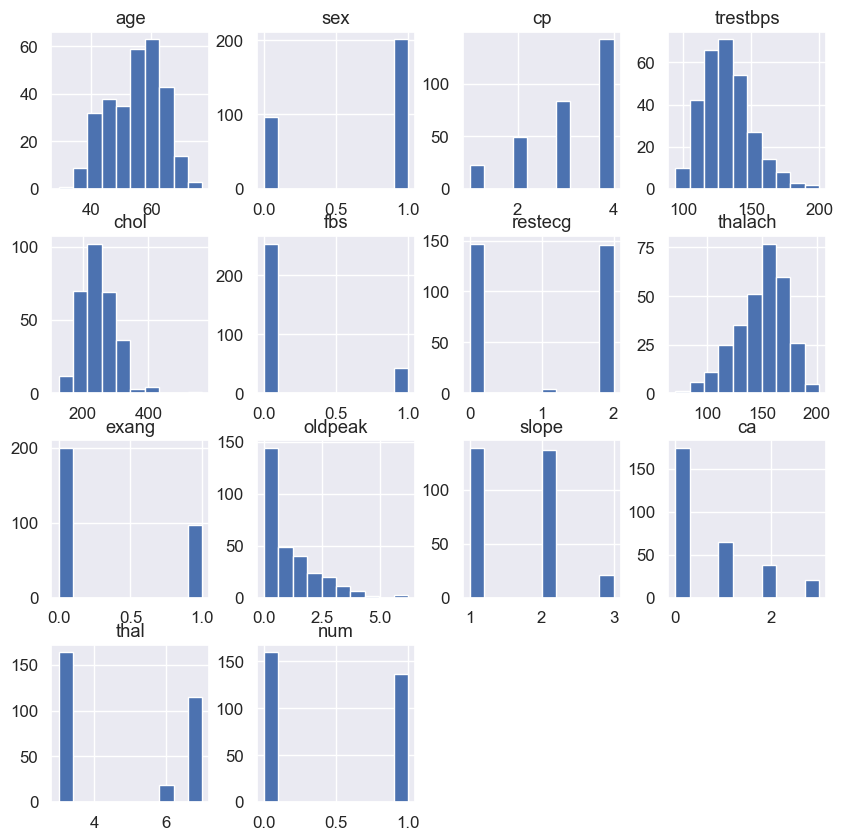

In [168]:
df.hist(figsize=(10,10))

In [169]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## Selecting Features

In [170]:
# Checking potential predictors
summary = df.groupby("num").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)
summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


Some columns have a small, but noticeable difference when stratified by predictors.


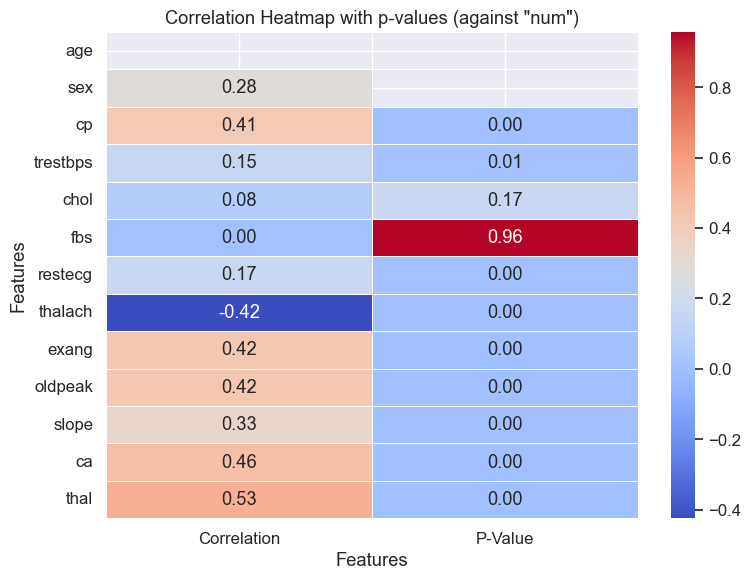

In [171]:
from scipy.stats import pearsonr
# Select the columns to calculate correlations with 'num'
selected_columns = df.columns[df.columns != 'num']

# Calculate the correlation coefficients and p-values
correlation_data = []
for column in selected_columns:
    corr, p_value = pearsonr(df[column], df['num'])
    correlation_data.append((corr, p_value))

# Create a DataFrame with the correlation coefficients and p-values
correlation_df = pd.DataFrame(correlation_data, columns=['Correlation', 'P-Value'], index=selected_columns)

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_df, dtype=bool))

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the correlation heatmap
heatmap = sns.heatmap(correlation_df, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

# Set the axis labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap with p-values (against "num")')

# Show the plot
plt.tight_layout()
plt.show()

The top 6 correlations hold up with p-values, let's use these features.

Our final features will be : `cp`, `thalac`, `ca`, `thal`, `oldpeak`, `exang`


## Building The Model

Now we've chosen our predictors, we can build our model. We'll start by splitting the data into training and testing sets. We'll use the formula presented in Statistical Analysis and Data Mining: The ASA Data Science Journal to determine the size of our training and testing sets.

In [172]:
predictors = ['cp', 'thalach', 'ca', 'thal', 'oldpeak', 'exang']
# Splits the data
X = df[predictors]
y = df['num']

# Determines test size
p = len(predictors)
test_size = 1 / (np.sqrt(p) + 1)
print(f'{test_size=:.3f}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

test_size=0.290


Let's check the ratios

In [173]:
y_train.value_counts(normalize=True)

0    0.533333
1    0.466667
Name: num, dtype: float64

In [174]:
y_test.value_counts(normalize=True)

0    0.551724
1    0.448276
Name: num, dtype: float64

Seems fairly even

In [176]:
# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [177]:
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.8238095238095238
Training Sensitivity:  0.7653061224489796
Training Specificity:  0.875


We have a training accuracy of 82%, the sensitivity is 77% and the specificity is 86%. Based on these metrics our model seems to perform better for non-cases.

## Interpreting Model Coefficients

In [179]:
# Checking in terms of log-odds
for coef, val  in zip(predictors, model.coef_[0]):
    print(coef, ":", round(val, 2))

cp : 0.24
thalach : -0.02
ca : 1.02
thal : 0.41
oldpeak : 0.45
exang : 0.69


In [180]:
# Checking in terms of odds
for coef, val  in zip(predictors, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

cp : 1.27
thalach : 0.98
ca : 2.78
thal : 1.51
oldpeak : 1.57
exang : 2.0


Holding other predictors constant, cp, ca, thal, oldpeak, and exang are all associated with higher odds of heart disease. The increases range from 27% with cp to 278% with ca.

Thalach actually has a decrease of 2% association when holding other predictors constant

## Final Model Evaluation

In [181]:
# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.8850574712643678
Test Sensitivity:  0.8461538461538461
Test Specificity:  0.9166666666666666


Our tast actually had over 5% better accuracy, with 7% more sensitivity and 6% more specificity. This is a good indication. 89% accuracy is quite solid!

The model is able to predict if someone has heart disease with 85% accuracy and if they do not with 92% accuracy. We could compare this with other published models to see how effective this would be relative to the best.

For possible improvements we could try:

    - using different predictors
    - using different models
    - scaling our data
    - using different training and testing sizes

However, I don't currently get paid enough for all of that. Maybe next time!